In [1]:
import bs4
import requests as rq
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.precision",3)
%precision %.3f

'%.3f'

In [2]:
res = rq.get("https://www.weather.go.kr/w/eqk-vol/archive/stat/trend.do",
             headers={'User-Agent': 'Mozilla/5.0'})

In [3]:
res.status_code

200

In [4]:
my_html = res.text
soup =  bs4.BeautifulSoup(my_html, 'html.parser')

In [17]:
res = soup.find('div', class_='over-scroll eqk-trend-content')

In [19]:
my_table = res.select('tr')

In [20]:
eqk_list = [i.text.strip().split('\n') for i in my_table]
eqk_list.pop(0)
eqk_list

[['1978', '5', '5', '6'],
 ['1979', '17', '8', '22'],
 ['1980', '6', '1', '16'],
 ['1981', '10', '3', '15'],
 ['1982', '11', '8', '13'],
 ['1983', '10', '4', '20'],
 ['1984', '7', '2', '19'],
 ['1985', '11', '6', '26'],
 ['1986', '12', '9', '15'],
 ['1987', '4', '5', '11'],
 ['1988', '4', '1', '6'],
 ['1989', '13', '4', '16'],
 ['1990', '3', '4', '15'],
 ['1991', '7', '8', '19'],
 ['1992', '7', '5', '15'],
 ['1993', '7', '4', '22'],
 ['1994', '11', '8', '24'],
 ['1995', '11', '8', '29'],
 ['1996', '14', '13', '39'],
 ['1997', '8', '8', '21'],
 ['1998', '7', '9', '32'],
 ['1999', '16', '22', '37'],
 ['2000', '8', '5', '29'],
 ['2001', '7', '6', '41'],
 ['2002', '11', '9', '49'],
 ['2003', '9', '12', '38'],
 ['2004', '6', '10', '42'],
 ['2005', '15', '6', '37'],
 ['2006', '7', '7', '50'],
 ['2007', '2', '5', '42'],
 ['2008', '10', '7', '46'],
 ['2009', '10', '10', '60'],
 ['2010', '5', '5', '42'],
 ['2011', '14', '7', '52'],
 ['2012', '9', '4', '56'],
 ['2013', '18', '15', '93'],
 ['2014

In [22]:
eqk_year = []
eqk_cnt = []
for i in (eqk_list):
    eqk_year.append(int(i[0]))
    eqk_cnt.append(int(i[3]))
eqk_year.pop(0)
eqk_cnt.pop(0)
print(eqk_year)
print(eqk_cnt)

[1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
[22, 16, 15, 13, 20, 19, 26, 15, 11, 6, 16, 15, 19, 15, 22, 24, 29, 39, 21, 32, 37, 29, 41, 49, 38, 42, 37, 50, 42, 46, 60, 42, 52, 56, 93, 49, 44, 252, 223, 115, 88, 68, 70, 77]


In [10]:
df = pd.DataFrame(data = zip(eqk_year, eqk_cnt), columns=['연도', '지진 총 횟수'])

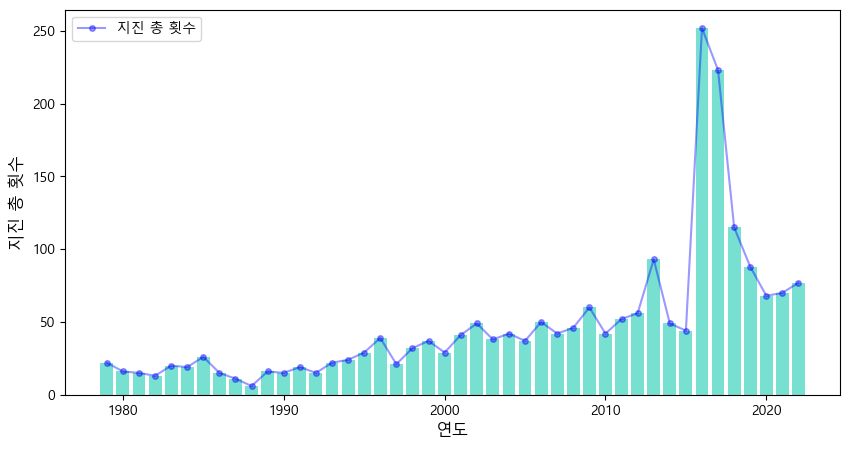

In [13]:
plt.rcParams['font.family'] = 'Malgun Gothic'
fig = plt.figure(figsize=(10,5))
fig.set_facecolor('white')
plt.bar(eqk_year, eqk_cnt, color='#3ed4be', alpha=0.7)
plt.plot(eqk_year, eqk_cnt, color='blue', alpha=0.4,
         linestyle='-', marker='o', markersize='4', label='지진 총 횟수')
plt.xlabel('연도', fontsize=12)
plt.ylabel('지진 총 횟수', fontsize=12)
plt.legend()
plt.show()